# Функции. Декораторы. 
# functools. itertools. operator. contextlib.

## Лекции по декораторам от CSC

In [1]:
from IPython.display import YouTubeVideo

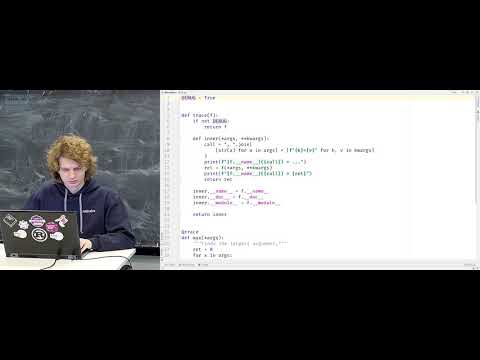

In [2]:
YouTubeVideo(id = "rkjg71GJPvA", width = 800, height = 400)

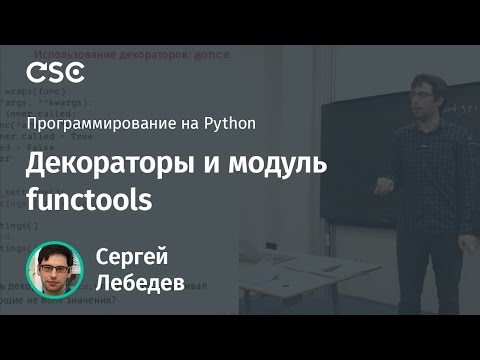

In [3]:
YouTubeVideo(id = "h_B3O5jWMi4", width = 800, height = 400)

## Функции

In [5]:
def foo(x):
    ''' foo(x) — я функция, которая просто возвращает полученное значение '''
    return x

Функции хранят достаточно много информации о себе и с помощью специальных литералов мы можем доставать из них эту информацию

*Примеры:*

In [6]:
foo.__name__         # атрибут имени функции

'foo'

In [7]:
foo.__doc__          # атрибут документации по функции

' foo(x) — я функция, которая просто возвращает полученное значение '

In [8]:
foo.__module__       # атрибут модуля (где находиться функция)

'__main__'

In [9]:
from math import *
factorial.__module__ # атрибут модуля (где находиться функция)

'math'

In [9]:
int.__module__       # атрибут модуля (где находиться функция)

'builtins'

Мы можем вызывать функцию как с именованными аргументами, так и с позиционными

Однако когда мы вызываем функцию с именованными аргументами, то есть шансы, что мы при переименовании переменной функции можем забыть про наше изменение и получить ошибку, но когда у функции много аргументов, то это спасает

*Примеры:*

In [11]:
def minimal(x, y):
    ''' minimal(x, y) — я возвращаю минимальное из входных значений '''
    return x if x < y else y

In [14]:
minimal(-10, 10)         # вызываем функции через позиционные аргументы
minimal(y = 10, x = -10) # вызываем функцию через именованные аргументы
minimal(-10, y = 10)     # вызываем функцию через позиционные и именованные аргументы

-10

Но что если мы захотели найти минимальное значение среди нескольних значений и мы не знаем сколько таких значений может быть

На помощь нам придёт следующая конструкция:

*какая-то_функция* (***аргументы_сюда**):
    
    что-то делает
    ...
    ...

*Пример:*

In [15]:
def minimal(*args):
    # type(args) => <class 'tuple'> (кортеж)
    
    res = float('inf') # берём значение +∞
    for element in args:
        res = element if element < res else res
    return res

In [16]:
minimal(-30, 200, -300, 1000, -3000)

-3000

In [22]:
lst = [1, 2, 3]
minimal(*lst)   # можно работать по любому объекту, которая может итерироваться
                # c помощью "*" мы распаковали list

1

Можно сделать так, чтобы мы требовали от пользователя хотя бы 1 аргумент

*Пример:*

In [23]:
minimal()  # при отсутствии аргументов наша функция выдаёт +∞
           # это логично, но печально :(

inf

In [26]:
def minimal(first, *rest):
    res = first
    for element in rest:
        res = element if element < res else res
    return res

In [27]:
minimal(1, 2, 3)

1

In [28]:
minimal('Hello', ',', ' ', 'World', '!')

' '

In [29]:
minimal()  # теперь наша функция будет выдавать ошибку, если мы её будем вызывать без аргументов
           # и это отлично :)

TypeError: minimal() missing 1 required positional argument: 'first'

Ещё в Python предусмотрен тот случай когда мы хотим вызывать аргументы только с именем, так называемые **ключевые аргументы** и если мы их будем вызывать как позиционные, то получим ошибку

Для демонстрации этого можно рассмотреть функцию Flatten, которая уплощает список до определённой степени вложенности

*Пример:*

In [30]:
def flat_once(lst: list) -> list:
    ''' Уплощает список lst на 1 уровне
    
        Аргументы:
            lst: list — список, который надо уплостить
        
        Возвращает:
            list — список, который уплощён на 1 уровень
    '''
    
    res = []
    
    for item in lst:
        if type(item) is list:         # проверяемый элемент список (?)
            res.extend(item)           # уплощаем его
        else:
            res.append(item)           # добавляем элемент в конец
            
    return res

In [31]:
lst = [1, [1, 2], [1, [3, [4]]]]       # степень вложенности - 3
flat_once(lst)                         # добились только 2 степени вложенности :(

[1, 1, 2, 1, [3, [4]]]

In [32]:
def flatten(lst: list, *, depth: int = 1) -> list:
    ''' Уплощает список на depth уровней
    
        Аргументы:
            lst: list — список, который будет уплощён на depth уровней
            depth: int — количество уровней на которое нужно уплостить список
        
        Возвращает:
            list — уплощённый список на depth уровней
    '''
    
    res = []                           # результирующий список
    for item in lst:                   # итерируемся по элементам списка
        current_depth = 0              # current_depth - текущая вложенность элемента
        if type(item) is list:         # проверяемый элемент список (?)
            more = True                # more - проверяет, нужно (можно, (надо)) ли нам ещё
                                       #        "углубляться" в текуший элемент
            while more and current_depth < depth - 1:  # пока нам нужно итерироваться  
                current_depth += 1                     # добавляем "глубину"
                more = any([type(_) is list for _ in item])  # если в рассматриваемом элементе 
                                                             # списки (?)
                item = flat_once(item)                       # уплощаем список 1 раз
            res.extend(item)                                 # добавляем содержимое расскрывая
                                                             # список
        else:
            more = False
            res.append(item)                                 # добавляем элемент
    return res

In [33]:
flatten(lst)             # по умолчанию вложенность 1

[1, 1, 2, 1, [3, [4]]]

In [34]:
flatten(lst, depth = 3)  # полностью сделали Flatten, как в Wolfram Mathematica
                         # без доп. аргументов

[1, 1, 2, 1, 3, 4]

Если мы попытаемся вызвать аргумент *depth*  в качестве позиционного, то Python нас отругает за такое!

In [35]:
flatten(lst, 3)

TypeError: flatten() takes 1 positional argument but 2 were given

Есть специальный синтаксис, как для позиционных аргументов, который позволяет нам вводить произволное количество только именованных аргументов

*Пример:*

In [36]:
def example(*args, **kwargs):
    return args, kwargs

In [41]:
args, kwargs = example(-10, 10, a = True, b = 'Hello')

И так получается, что позиционные аргументы в Python - это tuple (кортеж), а ключевые аргументы - это dict (словарь)

Поэтому имена двух ключевых аргументов не должны совпадать!

Иначе, переменная примет последнее присвоенное ей значение, а первое будет забыто

In [38]:
print(args)
type(args)

(-10, 10)


tuple

In [39]:
print(kwargs)
type(kwargs)

{'a': True, 'b': 'Hello'}


dict

Получается, что ключевые аргументы тоже можно распаковывать

Теперь распаковывать позиционные аргументы можно из списка с помощью "*", а распаковывать ключевые аргументы из словаря через "**"

*Пример:*

In [42]:
args, kwargs = example(*[-10, 10], **{'a': True, 'b': 'Hello'})
args, kwargs

((-10, 10), {'a': True, 'b': 'Hello'})

## Декораторы

### Да кто такой этот ваш декоратор?

**Декоратор** — это "обёртка", которая даёт нам возможность изменить поведение функции, не изменяя её исходный код. По сути, это функции высшего порядка, которые принимают на вход функцию и возвращает тоже функцию, но при этом не меняет её исходный код

In [44]:
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)  # печатаем имя функции, которая в аргументе
                                            # и аргументы этой функции
        return func(*args, **kwargs)        # возвращаем эту же функцию
    return inner

In [47]:
@trace  # первый вариант применения декоратора "trace"
def example(x):
    ''' Привет, я документация функции example. '''
    return x

In [48]:
example(10)

example (10,) {}


10

In [49]:
# реинициализируем нашу функцию
def example(x):
    ''' Привет, я документация функции example. '''
    return x

Как можно видеть, то наша функция имеет атрибуты имени, документации, модуля

In [50]:
example.__name__, example.__doc__, example.__module__

('example', ' Привет, я документация функции example. ', '__main__')

In [52]:
example = trace(example)                              # второй вариант применения декоратора

Однако после применения декоратора можно видеть, что у нас изменились все атрибуты нашей исходной функции и это достаточно неприятно и даже грустно :(

In [53]:
example.__name__, example.__doc__, example.__module__

('inner', None, '__main__')

Попробуем исправить эту неприятность

In [54]:
# реининциализируем наш декоратор
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)  # печатаем имя функции, которая в аргументе
                                            # и аргументы этой функции
        return func(*args, **kwargs)        # возвращаем эту же функцию
    inner.__module__ = func.__module__      # передаём атрибут модуля func в inner
    inner.__doc__ = func.__doc__            # передаём атрибут документации func в inner
    inner.__name__ = func.__name__          # передаём атрибут имени func в inner
    return inner

In [55]:
# реинициализируем нашу функцию
@trace
def example(x):
    ''' Привет, я документация функции example. '''
    return x

In [56]:
example.__name__, example.__doc__, example.__module__  # Ура! Мы молодцы!

('example', ' Привет, я документация функции example. ', '__main__')

## functools: инструмент для манипулирования функциями

[*ссылка на все методы в модуле functools*](https://docs.python.org/3/library/functools.html)

### @functools.wraps

Но в Python есть замечательный модуль functools и в нём есть метод wraps, который всё делает за нас и нам не надо явно присваивать все атрибуты исходной функции

Поэтому можно сделать просто так:

In [57]:
import functools

In [58]:
# реининциализируем наш декоратор
def trace(func):
    @functools.wraps(func)                  # копируем все атрибуты исходной функции func
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)  # печатаем имя функции, которая в аргументе
                                            # и аргументы этой функции
        return func(*args, **kwargs)        # возвращаем эту же функцию
    return inner

In [59]:
example.__name__, example.__doc__, example.__module__  # Ура! Всё получилось!

('example', ' Привет, я документация функции example. ', '__main__')

## Примеры полезных  декораторов

### Декоратор, который профилирует функции (считает количество обращений к функции)

In [64]:
def profiled(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        inner.__ncalls__ += 1      # задали новый атрибут, который будет считать кол-во
                                   # обращений к функции
        return func(*args, **kwargs)
    
    inner.__ncalls__ = 0           # обнуляем при новом запусков функции
    return inner

In [72]:
def fibonacci(n: int = 1) -> int:
    return 1 if n < 3 else fibonacci(n - 1) + fibonacci(n - 2)

In [73]:
fibonacci = profiled(fibonacci)

In [74]:
fibonacci.__ncalls__

0

In [75]:
fibonacci(20)

6765

In [76]:
fibonacci.__ncalls__

13529

### Декоратор, который делает что-то один раз

In [77]:
def once(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        if not inner.__called__:  # новый атрибут, который будет проверять не вызывали ли мы  
                                  # функцию ранее
            inner.__called__ = True        
            return func(*args, **kwargs)
    inner.__called__ = False      # при повторном запуске реинциализируем
    return inner

In [78]:
@once
def initialization():
    print('Я что-то инициализирую 1 раз')

In [79]:
initialization()  # вызвали первый раз - всё отлично

Я что-то инициализирую 1 раз


In [80]:
initialization()  # вызвали функцию второй раз и всё умерло

### Декоратор мемоизации

In [86]:
def memoized(func):
    cache = {}

    @functools.wraps(func)
    def inner(*args, **kwargs):
        key = args + tuple(sorted(kwargs.items()))  # забираем все аргументы
        if key not in cache:  # не запускали ли мы нашу функцию с такими аргументами (?)
            cache[key] = func(*args, **kwargs)  # создаём новый ключ с вычисленным значением
        return cache[key]
    return inner

**Функция Аккермана**

Функция принимает на вход два неотрицательных целых числа, а на выходе мы получаем натуральное число

Фишка этой функции в том, что она растёт ооочень быстро и при входных данных *A(4,4)* мы уже получим число, которое больше, чем количество атомов во Вселенной

Ещё эта функция задаётся рекурсивно, что идеально подходит для использования декоратора - *memoized*

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/c8c2aa0b20532014ea35c4a09c2380a01b3d1423" width = 800 />

In [81]:
@profiled
def ackermann(m: int, n: int) -> int:
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return ackermann(m - 1, 1)
    elif m > 0 and n > 0:
        return ackermann(m - 1, ackermann(m, n - 1))
    else:
        return 'Некорректные значения'

In [82]:
ackermann(3, 7)

1021

In [83]:
ackermann.__ncalls__

693964

In [93]:
@profiled
@memoized
def ackermann(m, n):
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return ackermann(m - 1, 1)
    elif m > 0 and n > 0:
        return ackermann(m - 1, ackermann(m, n - 1))
    else:
        return 'Некорректные значения'

In [94]:
ackermann(3, 7)

1021

In [95]:
ackermann.__ncalls__

3074

#### Как использовать два декоратора одновременно (?)

**Нужно запомнить,** что декараторы применяются сверху внизу!

Если же рассмотреть альтернативный вид записи, то по степени вложенности, первыми идут внешние декораторы, а дальше "вглубь"

*Пример:*

In [96]:
def square(func):
    return lambda x: func(x * x)

In [97]:
def add_one(func):
    return lambda x: func(x + 1)

In [98]:
# Пример №1
@square         # сначала возвели в квадрат
@add_one        # затем прибавили единицу 
def example(x):
    return x

In [99]:
example(10)

101

In [100]:
# Пример №2 
@add_one         # сначала прибавили единицу
@square          # затем возвели в квадрат
def example(x):
    return x

In [101]:
example(10)

121

In [102]:
def example(x):
    return x

In [104]:
example = square(add_one(example))  # пример №1, только в другом стиле записи
example(10)                         # square => add_one

10202

In [105]:
def example(x):
    return x

In [106]:
example = add_one(square(example))  # пример №1, только в другом стиле записи
example(10)                         # add_one => square

121

### @functools.lru_cache

**@functools.lru_cache(maxsize = 128, typed = False)** — декоратор, который сохраняет результаты *maxsize* последних вызовов. Это может сэкономить время при дорогих вычислениях, если функция периодически вызывается с теми же аргументами.

Поскольку в качестве кэша используется словарь, все аргументы должны быть хешируемыми.

Если maxsize установлен в None, кэш может возрастать бесконечно, но это сильно нагружает оперативную память. Также функция наиболее эффективна, если maxsize это степень двойки.

Если typed = True, аргументы функции с разными типами будут кэшироваться отдельно. Например, *f(3)* и *f(3.0)* будут считаться разными вызовами, возвращающие, возможно, различный результат.

Похож на декоратор - *memoized*

In [108]:
@functools.lru_cache(maxsize = 64)
def fibonacci(n: int = 1) -> int:
    return 1 if n < 3 else fibonacci(n - 1) + fibonacci(n - 2)

In [109]:
fibonacci(100)

354224848179261915075

In [110]:
fibonacci.cache_info()    # hits - сколько раз мы попали в кэш
                          # misses - сколько раз мы не попали в кэш и пришлось считать значения
                          # maxsize - размер кэша
                          # currentsize - последний размер кэша

CacheInfo(hits=97, misses=100, maxsize=64, currsize=64)

In [111]:
fibonacci.cache_clear()   # очищаем кэш
fibonacci.cache_info()

CacheInfo(hits=0, misses=0, maxsize=64, currsize=0)

### @functools.singledispatch

В Python есть обобщённые функции или мультиметоды

Это функции, которые можно применять к множеству объектов

Например функции: <font color='blue'>*len()*</font>, <font color='blue'>*sum()*</font>, <font color='blue'>*str()*</font> и другие


*Примеры:*

In [112]:
# Пример c len()
print(len([1, 2, 3, 4]))          # для списков
print(len('Hello World!!!'))      # для строк
print(len((1, 2, 3, 4, 5, 6)))    # для кортежей
print(len(range(0, 10, 2)))       # для range

4
14
6
5


In [113]:
# Пример с str()
print(str([1, 2, 3, 4]))          # для списков
print(str(12))                    # для чисел
print(str(range(0, 10, 2)))       # для range
print(str((1, 2, 3, 4, 5, 6)))    # для кортежей

[1, 2, 3, 4]
12
range(0, 10, 2)
(1, 2, 3, 4, 5, 6)


In [114]:
# Пример с sum()
print(sum([1, 2, 3, 4]))          # для списков
print(sum((1, 2, 3, 4, 5, 6)))    # для кортежей
print(sum(range(0, 10, 2)))       # для range
print(sum([[1], [2]], [3]))       # для конкатенации (соединения) списков

10
21
20
[3, 1, 2]



**@functools.singledispatch** — декоратор, который превращает функцию в мультиметод (или обобщённую функцию).

*Пример с* **@functools.singledispatch**:

Создадим функцию <font color='blue'>pack()</font>, которая будет переводить объекты в шестнадцатиричную СС и указывать тип объекта, который она перевела

In [115]:
@functools.singledispatch
def pack(obj):
    type_name = type(obj).__name__
    assert False, 'Некорректный тип: ' + type_name   # assert проверяет на ошибку, когда у нас
                                                     # нет типа к которому мы обратились

In [116]:
@pack.register(int)                                  # регистрируем новый тип объекта
def _(obj):
    return b'Int: ' + hex(obj).encode('ascii')       # литерал 'b' показывает, что мы хотим 
                                                     # увидеть объект типа bytes, а не str

In [117]:
@pack.register(list)                                 # регистрируем новый тип объекта
def _(obj):
    return b'List: ' + b', '.join(map(pack, obj))

In [121]:
print(pack([1, 2, 3]))                               # работает со списком
print(pack(2 ** 13))                                 # работает с целыми числами

b'List: Int: 0x1, Int: 0x2, Int: 0x3'
b'Int: 0x2000'


In [122]:
print(pack(10.))                                     # не работает с вещественными числами

AssertionError: Некорректный тип: float

### functools.partial

**functools.partial(func, \*args, **kwargs)** — возвращает partial-объект (по сути, функцию), который при вызове вызывается как функция *func*, но дополнительно передают туда позиционные аргументы *args*, и именованные аргументы *kwargs*. Если другие аргументы передаются при вызове функции, то позиционные добавляются в конец, а именованные расширяют и перезаписывают.

*Пример использования*  **finctools.partial**:

In [124]:
def count_animals(number, kind, *, adjective = 'big'):           # аргумент adjective - ключевой
    print(f'{number} {adjective} {kind}')

<center> <b> Мы будем считать корги! </b> </center>

<img src="https://miro.medium.com/max/580/1*tKM7HOZ4JUoMZMRLP3XbzA.png" width="550" height="500"/>

In [125]:
count_animals_trace = trace(count_animals)
count_animals_trace(10, 'corgi', adjective = 'small')

count_animals (10, 'corgi') {'adjective': 'small'}
10 small corgi


In [127]:
count_corgi = functools.partial(count_animals, kind = 'corgi') # назначам ключевое значение kind
count_corgi(10)

10 big corgi


In [130]:
count_corgi(10, kind = 'corgi', adjective = 'cutest')          # изменили ключевое значение kind

10 cutest corgi


In [131]:
count_corgi.keywords                                           # смотрим на ключевые значения

{'kind': 'corgi'}

In [132]:
count_corgi(10, 'puppies')                                     # без ключа теперь у нас 
                                                               # не получиться посчитать корги
                                                               # и это грустно :(

TypeError: count_animals() got multiple values for argument 'kind'

*Ещё один пример, но уже с позиционным аргументом*:

In [133]:
def add(x, y):
    return x + y

In [134]:
p_add = functools.partial(add, 2)                              # теперь первое позиционное 
                                                               # значение x получило значение 2

In [140]:
p_add(y = 4)                                                   # теперь для запуска функции 
                                                               # достаточно 1 аргумента - x
p_add(4)

6

In [141]:
p_add.args                                                     # смотрим значения позиционных 
                                                               # аргументов 

(2,)

In [147]:
p2_add = functools.partial(add, 2, 4)                          # теперь назначили 2 позиционных
                                                               # аргумента

In [143]:
p2_add()                                                       # можно вообще не назначать 
                                                               # аргументы :)

6

In [144]:
p2_add.args                                                    # смотрим позиционные аргументы

(2, 4)

In [157]:
p2_add = functools.partial(add, 2, 10)                         # можем перезаписать аргументы
p2_add()

12

### functools.reduce

**functools.reduce(function, iterable)** — берёт два первых элемента, применяет к ним функцию *function*, берёт результирующее значение и третий элемент, применяет к ним функцию *function* и таким образом сворачивает *iterable* в одно значение.

Короче, это как *Fold* в *Wolfram Mathematica*!

*Пример с*  **functools.reduce(function, iterable)**:

In [158]:
functools.reduce(lambda x, y: x + y, [1, 2, 3, 4, 5])  # алгоритм вычислений ((((1+2)+3)+4)+5)

15

In [159]:
functools.reduce(lambda x, y: f'({x} + {y})', [1, 2, 3, 4, 5])

'((((1 + 2) + 3) + 4) + 5)'

In [160]:
functools.reduce(lambda x, y: x * y, [1, 2, 3, 4, 5])  # алгоритм вычислений ((((1*2)*3)*4)*5)

120

<center> <i>Факт про </i> <b> reduce </b> : </center>

Изначально, в версии Python 2, *reduce* был в модуле *buildins*, но когда делали версию Python 3 мистер Ван Россум грозился со страшной силой выпилить *map*, *filter*, *reduce*, но потом ему позвонил Стивен Вольфрам и они договорились, что просто уберут *reduce* в модуль *functools*

Всё так и было, честное слово!

## itertools: функции-итераторы

[*ссылка на все методы в модуле itertools*](https://docs.python.org/3/library/itertools.html)

In [161]:
import itertools

### Объединение и разделение итераторов

**itertools.chain(*iterables)** — возвращает по одному элементу из первого итератора, потом из второго, до тех пор, пока итераторы не кончатся.

По всему, что может итерироваться, можно итерироваться :)

*Пример:*

In [163]:
for element in itertools.chain(
    [1, 2, 3], 'abc', (True, False), {'animal': 'corgi', 'type of animal': 'welsh'}):
    
    print(element, end = ' ')  # хочу чтобы всё печаталось в строчку - 'end': \n → *space*

1 2 3 a b c True False animal type of animal 

**itertools.islice(iterable, start = 0, stop, step)** — создает итератор, который возвращает итератор, выдающий входные элементы в соответствии c заданными индексами. Просто итератор, который работает аналогично простым срезам данных.

Стоит заметить, что выборка происходит следующим образом: [start, stop) !

Что и в случае с range

*Примеры:*

In [164]:
print('Верни мне только пять первых элементов:')
for i in itertools.islice(range(100), 5):                  # в данном примере start - задаётся
                                                           # поумолчанию равным нулю, как и 
                                                           # в случае с range
    print(i, end = ' ')

Верни мне только пять первых элементов:
0 1 2 3 4 

In [165]:
print('Верни мне элементы начиная с 5 и заканчиваю 9:')
for i in itertools.islice(range(100), 5, 10):
    print(i, end = ' ')

Верни мне элементы начиная с 5 и заканчиваю 9:
5 6 7 8 9 

In [166]:
print('Верни мне элементы от 0 до 100 с шагом 10:')
for i in itertools.islice(range(101), 0, 101, 10):
    print(i, end = ' ')

Верни мне элементы от 0 до 100 с шагом 10:
0 10 20 30 40 50 60 70 80 90 100 

**itertools.tee(iterables, n = 2)** — создаёт несколько независимых итераторов на основе одного и того же итерируемого объекта.

In [167]:
r = itertools.islice(range(101), 0, 101, 10)
i1, i2, i3 = itertools.tee(r, 3)                            # создаётся просто кортеж итераторов
print('Итератор 1:', list(i1))
print('Итератор 2:', list(i2))
print('Итератор 3:', list(i3))

Итератор 1: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Итератор 2: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Итератор 3: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


### Создание новых данных

**itertools.count(start = 0, step = 1)** — создаёт бесконечную арифметическая прогрессия с первым членом *start* и шагом *step*.

In [169]:
list(itertools.islice(itertools.count(0, 10), 11))           # ещё один способ создавать списки
                                                             # но не лучший

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [171]:
for element in zip(itertools.count(1), ['a', 'b', 'c']):
    print(element)

(1, 'a')
(2, 'b')
(3, 'c')


**itertools.cycle(iterable)** — создает итератор, повторяющий содержимое аргументов
бесконечное количество раз.

In [175]:
for _ in zip(range(5), itertools.cycle('abc')):              # кол-во элементов в первом 
    print(_)                                                 # аргументе zip и во втором 
                                                             # не равное, но за счёт cycle, нам
                                                             # удалось компенсировать это,
                                                             
                                                             # В противном случае мы бы просто
                                                             # получили сокращение кол-ва 
                                                             # элементов по наименьшему кол-ву 
                                                             # элементов из двух объектов в zip

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'a')
(4, 'b')


**itertools.repeat(element, n = 'inf')** — создает итератор, возвращающий одно и то же значение при каждом обращении к нему.

In [177]:
for element in itertools.repeat('Привет, меня зовут repeat!', 5):
    print(element)

Привет, меня зовут repeat!
Привет, меня зовут repeat!
Привет, меня зовут repeat!
Привет, меня зовут repeat!
Привет, меня зовут repeat!


**Задачка** (наглейшим образом украденная!):


Дан массив длины N, заполненный произвольными целыми числами. Необходимо передвинуть все нули в конец массива, сохранив при этом порядок остальных чисел.

*Пример:*

[2, 0, 3, 1, 0, 6, 6, 0, 7] → [2, 3, 1, 6, 6, 7, 0, 0, 0]

*Как бы решал я:*

In [180]:
def zero_sort(array: list) -> list :
    without_zero = list(filter(lambda _: _ != 0, array))
    return without_zero + list(itertools.repeat(0, len(array) - len(without_zero)))

In [181]:
print(zero_sort([]))
print(zero_sort([0, 1]))
print(zero_sort([2, 0, 3, 1, 0, 6, 6, 0, 7]))

[]
[1, 0]
[2, 3, 1, 6, 6, 7, 0, 0, 0]


### Фильтрация

**itertools.dropwhile(func, iterable)** — создает итератор, который начинает воспроизводить
элементы входного итераторируемого объекта сразу же после того, как для заданного условия будет получено ложное значение. Функция не тестирует все элементы входной последовательности. Как только условие принимает ложное значение, она начинает возвращать все оставшиеся элементы.

In [193]:
list(itertools.dropwhile(lambda _: _ < 5, [1, 4, 6, 4, 1, 6]))

[6, 4, 1, 6]

In [195]:
for element in itertools.dropwhile(lambda _: _ < 5, [1, -1, 2, 101, 3, 10, 30]):
    print(element, end = ' ')

101 3 10 30 

Если есть *dropwhile*, то есть и *takewhile*

**itertools.takewhile(func, iterable)** — создает итератор, который выдает элементы из входного итерируемого объекта, пока тестирующая функция возвращает истинное значение.

In [198]:
list(itertools.takewhile(lambda _: _ < 5, [1, 4, 6, 4, 1]))

[1, 4]

In [199]:
for element in itertools.takewhile(lambda _: _ < 5, [1, -1, 2, 101, 3, 10, 30]):
    print(element, end = ' ')   

1 -1 2 

**itertools.compress(iterable, selector)** — предлагает другой способ фильтрации содержимого итерируемого объекта. Вместо того чтобы вызывать функцию, она использует значения другого итерируемого объекта для индикации того, следует ли принять значение или игнорировать его.

*Привет! Я Pick из Wolfram Mathematica, не узнали?*

In [200]:
print(list(itertools.compress('ABCDEF', [1, 0, 1, 0, 1, 1])))
print(list(itertools.compress((1, 2, 3, 4), [True, False, False, True])))

['A', 'C', 'E', 'F']
[1, 4]


0 2 4 6 8 10 

### Группирование данных

**itertools.groupby(iterable, key = None)** — группирует элементы по значению. Значение получается применением функции *key* к элементу.

In [203]:
[(k, len(list(v))) for k, v in itertools.groupby(iterable = 'AAAABBBCCDAAAACCC')]

[('A', 4), ('B', 3), ('C', 2), ('D', 1), ('A', 4), ('C', 3)]

In [204]:
{k: list(v) for k, v in itertools.groupby([('a', 'b'), ('a', 'c'), ('b', 'c')], lambda _: _[0])}

{'a': [('a', 'b'), ('a', 'c')], 'b': [('b', 'c')]}

In [208]:
things = [
            ('животное', 'медведь'), 
            ('животное', 'олень'), 
            ('растение', 'кактус'),
            ('машина', 'автобус')
         ]

In [210]:
for key, group in itertools.groupby(things, lambda _: _[0]):
    for value in group:
        print(f'{value[1]} - это {key}')

медведь - это животное
олень - это животное
кактус - это растение
автобус - это машина


### Комбинирование входных данных

**itertools.accumulate(iterable, func = operator.add)** — аккумулирует *iterable* по *func*, в частном случае - "частичная сумма" объекта *iterable*.

In [212]:
list(
    itertools.accumulate(
        iterable = list(itertools.islice(itertools.count(1), 5))
        )
    )

[1, 3, 6, 10, 15]

In [213]:
list(itertools.accumulate("Hello World!"))

['H',
 'He',
 'Hel',
 'Hell',
 'Hello',
 'Hello ',
 'Hello W',
 'Hello Wo',
 'Hello Wor',
 'Hello Worl',
 'Hello World',
 'Hello World!']

Можно задать какую-нибудь кастомную функцию и сделать **itertools.accumulate** по этой функции

In [214]:
def func(a, b):
    print(a,b)
    return a + 2 * b

In [227]:
list(itertools.accumulate('abcde', func))

a b
abb c
abbcc d
abbccdd e


['a', 'abb', 'abbcc', 'abbccdd', 'abbccddee']

**itertools.product(*iterable, repeat = 1)** — аналог вложенных циклов. Возвращает эта функция конечно же объект типа *itertools.product*, но если его конвертировать в *list*, то элементы списка будут в виде кортежа.

Стоит заметить, что аргумент *repeat* является ключевым!

In [216]:
[i + j for i in 'ABCD' for j in 'xy']

['Ax', 'Ay', 'Bx', 'By', 'Cx', 'Cy', 'Dx', 'Dy']

In [217]:
print(list(itertools.product('ABCD', 'xy')), end = ' ')

[('A', 'x'), ('A', 'y'), ('B', 'x'), ('B', 'y'), ('C', 'x'), ('C', 'y'), ('D', 'x'), ('D', 'y')] 

In [218]:
list(map(lambda _: _[0] + _[1], list(itertools.product('ABCD', 'xy'))))

['Ax', 'Ay', 'Bx', 'By', 'Cx', 'Cy', 'Dx', 'Dy']

Не знаю почему, но у меня возникла сразу же ассоциация с Outer из *Wolfram Mathematica*

Может не у меня одного

Но что-то в этом есть

```
In[1]:= Outer[StringJoin, Characters["ABCD"], Characters["xy"]]
Out[1]:= {{Ax, Ay}, {Bx, By}, {Cx, Cy}, {Dx, Dy}}
```

In [219]:
print(list(itertools.product('ABCD', 'xy', repeat = 2)), end = ' ')

[('A', 'x', 'A', 'x'), ('A', 'x', 'A', 'y'), ('A', 'x', 'B', 'x'), ('A', 'x', 'B', 'y'), ('A', 'x', 'C', 'x'), ('A', 'x', 'C', 'y'), ('A', 'x', 'D', 'x'), ('A', 'x', 'D', 'y'), ('A', 'y', 'A', 'x'), ('A', 'y', 'A', 'y'), ('A', 'y', 'B', 'x'), ('A', 'y', 'B', 'y'), ('A', 'y', 'C', 'x'), ('A', 'y', 'C', 'y'), ('A', 'y', 'D', 'x'), ('A', 'y', 'D', 'y'), ('B', 'x', 'A', 'x'), ('B', 'x', 'A', 'y'), ('B', 'x', 'B', 'x'), ('B', 'x', 'B', 'y'), ('B', 'x', 'C', 'x'), ('B', 'x', 'C', 'y'), ('B', 'x', 'D', 'x'), ('B', 'x', 'D', 'y'), ('B', 'y', 'A', 'x'), ('B', 'y', 'A', 'y'), ('B', 'y', 'B', 'x'), ('B', 'y', 'B', 'y'), ('B', 'y', 'C', 'x'), ('B', 'y', 'C', 'y'), ('B', 'y', 'D', 'x'), ('B', 'y', 'D', 'y'), ('C', 'x', 'A', 'x'), ('C', 'x', 'A', 'y'), ('C', 'x', 'B', 'x'), ('C', 'x', 'B', 'y'), ('C', 'x', 'C', 'x'), ('C', 'x', 'C', 'y'), ('C', 'x', 'D', 'x'), ('C', 'x', 'D', 'y'), ('C', 'y', 'A', 'x'), ('C', 'y', 'A', 'y'), ('C', 'y', 'B', 'x'), ('C', 'y', 'B', 'y'), ('C', 'y', 'C', 'x'), ('C', 'y'

**itertools.permutations(iterable, r = None)** — перестановки длиной *r* из *iterable*.

In [221]:
print(list(itertools.permutations(['a', 'b', 'c'])))

[('a', 'b', 'c'), ('a', 'c', 'b'), ('b', 'a', 'c'), ('b', 'c', 'a'), ('c', 'a', 'b'), ('c', 'b', 'a')]


In [223]:
print(list(itertools.permutations(['a','b','c','d'], 3)))

[('a', 'b', 'c'), ('a', 'b', 'd'), ('a', 'c', 'b'), ('a', 'c', 'd'), ('a', 'd', 'b'), ('a', 'd', 'c'), ('b', 'a', 'c'), ('b', 'a', 'd'), ('b', 'c', 'a'), ('b', 'c', 'd'), ('b', 'd', 'a'), ('b', 'd', 'c'), ('c', 'a', 'b'), ('c', 'a', 'd'), ('c', 'b', 'a'), ('c', 'b', 'd'), ('c', 'd', 'a'), ('c', 'd', 'b'), ('d', 'a', 'b'), ('d', 'a', 'c'), ('d', 'b', 'a'), ('d', 'b', 'c'), ('d', 'c', 'a'), ('d', 'c', 'b')]


**itertools.combinations(iterable, r)** — комбинации длиной *r* из *iterable* без повторяющихся элементов.

*Subsets из Wolfram Mathematica передаёт всем "Привет" в этом чатике*

```
In[2]:= Subsets[Characters["ABCD"], {2}]
Out[2]:= {{A, B}, {A, C}, {A, D}, {B, C}, {B, D}, {C, D}}
```

*Python* : — "Дашь списать домашку?"

*Wolfram Mathematica* : — "Да, только не списывай точь-в-точь, чтобы не спалили."

*Python* : — "Ок"

In [224]:
list(itertools.combinations('ABCD', 2))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

## operator: функциональный интерфейс встроенных операторов

[*ссылка на все методы в модуле operator*](https://docs.python.org/3/library/operator.html)

Время от времени в процессе программирования c использованием итераторов возникает необходимость в создании небольших функций для вычисления простых выражений. Иногда это можно реализовать c помощью анонимных функий, но для некоторых операций новые функции вообще не нужны. Модуль **operator** содержит функции, которые соответствуют встроенным арифметическим операгорам, операторам сравнения и другим стандартным операторам.

In [225]:
import operator

### Логические операции

\*тут всё просто, так что будет только 1 пример\*

**operator.truth(obj)** — возвращает *True* если объект - true, *False* в противном случае. (это тупо, но так написал сам Гвидо ван Россум в документации к модулю)

Абсолютный эквивалент *bool(obj)*

In [228]:
help(operator.truth)              # вот и кончились хиханьки да хахоньки

Help on built-in function truth in module _operator:

truth(a, /)
    Return True if a is true, False otherwise.



In [229]:
lst_obj = [10, 0, -10, None, (1, 2), 'корги', False, [1]]

In [230]:
print(list(map(operator.truth, lst_obj)))
list(map(operator.truth, lst_obj)) == list(map(bool, lst_obj))

[True, False, True, False, True, True, False, True]


True

**operator.not_(obj)** — возвращает логическое отрицание от *obj*.

In [ ]:
help(operator.not_)                 # время крутых документаций от мистера Гвидо

In [ ]:
print(list(map(operator.not_, lst_obj)))
list(map(operator.not_, lst_obj)) == list(map(lambda _: not bool(_), lst_obj))

**operator.is_(a, b)** — возвращает логическое значение после проверки: *a* - это *b* (?).  Проверяет идентичность объекта.

<center> <i> мемы, которые мы заслужили!!! </i> </center>

<img src="meme.png" width="550" height="500"/>

In [ ]:
list(map(lambda _: operator.is_(*_), itertools.product('abcdaaa', 'a')))

In [ ]:
list(map(lambda _: _[0] is _[1], itertools.product('abcdaaa', 'a')))

**operator.is_not(a, b)** — возвращает логическое значение после проверки: *a* - это не *b* (?).  Проверяет идентичность объекта.

*мема не будет, можно расходиться*

In [ ]:
list(map(lambda _: operator.is_not(*_), itertools.product('abcdaaa', 'a')))

In [ ]:
list(map(lambda _: _[0] is not _[1], itertools.product('abcdaaa', 'a')))

### Операторы сравнения

\*тут тоже всё просто, поэтому будет только 1 пример на весь блок\*

**operator.lt(a, b)** — возвращает логическое значение после проверки: *a* < *b* (?).

Эквивалент: *a* < *b*

**operator.le(a, b)** — возвращает логическое значение после проверки: *a* <= *b* (?).

Эквивалент: *a* <= *b*

**operator.eq(a, b)** — возвращает логическое значение после проверки: *a* == *b* (?).

Эквивалент: *a* == *b*

**operator.ne(a, b)** — возвращает логическое значение после проверки: *a* != *b* (?).

Эквивалент: *a* != *b*

**operator.gt(a, b)** — возвращает логическое значение после проверки: *a* > *b* (?).

Эквивалент: *a* > *b*

**operator.ge(a, b)** — возвращает логическое значение после проверки: *a* >= *b* (?).

Эквивалент: *a* >= *b*

In [ ]:
a = 0.566
b = 3.14

print('a =', a)
print('b =', b)

for func in (operator.lt, operator.le, operator.eq, operator.ne, operator.gt, operator.ge):
    print(f'{func.__name__}(a, b): {func(a,b)}')

### Простейшие операторы

In [ ]:
a = -1
b = 5.0
c = 3
d = 6

print('Значение:')
for _ in [('a', a), ('b', b), ('c', c), ('d', d)]:
    print(f'{_[0]} = {_[1]}')

In [ ]:
def show_func(functions: tuple, *arguments) -> None:
    for func in functions:
        for arg in arguments:
            print(f'{func.__name__}{arg}: {func(*arg)}')

#### Позитивные и негативные операторы

**operator.abs(obj)** — возвращает абсолютное значение (модуль) *obj*.

**operator.neg(obj)** — возвращает "отрицание" значения *obj* → *(-obj)*.

**operator.pos(obj)** — возвращает "положительное" значения *obj* → *(+obj)*.

In [ ]:
print('Позитивные / Негативные операторы:\n')
show_func(
            (operator.abs, operator.neg, operator.pos), 
            {a}, 
            {b}
        )

#### Арифметические операторы

**operator.add(a, b)** — возвращает значение *a* + *b*.

**operator.floodiv(a, b)** — возвращает значение *a* // *b*.

**operator.mod(a, b)** — возвращает значение *a* % *b*.

**operator.mul(a, b)** — возвращает значение *a* * *b*.

**operator.pow(a, b)** — возвращает значение *a* \** *b*.

**operator.sub(a, b)** — возвращает значение *a* - *b*.

**operator.truediv(a, b)** — возвращает значение *a* / *b*.

In [ ]:
print('Арифметические операторы:\n')
show_func(
            (operator.add, operator.floordiv, operator.mod, operator.mul, operator.pow, 
             operator.sub, operator.truediv),
            {c, d}
        )

#### Побитовые операторы

**operator.and_(a, b)** — возвращает побитовое значение *a* *and* *b*.

**operator.or_(a, b)** — возвращает побитовое значение *a* *or* *b*.

**operator.xor(a, b)** — возвращает побитовое исключающее ИЛИ значение *a* и *b*.

**operator.lshift(a, b)** — возвращает значение *a*, сдвинутое влево на *b* бит.

**operator.rshift(a, b)** — возвращает значение *a*, сдвинутое вправо на *b* бит.

**operator.invert(a)** — возвращает побитовое обратное число *a*.

In [ ]:
print('Побитовые операторы:\n')
show_func(
            (operator.and_, operator.or_, operator.xor, operator.lshift, operator.rshift),
            {c, d}
        )
print(f'invert({d}): {operator.invert(d)}')

### Операторы для работы с последовательностями

\* в данном контексте под последовательностями подразумевается объект типа *list* или *dict* \*

In [ ]:
a = [1, 2, 3, 1]
b = ['a', 'b', 'c']

print('Значения:\n')
print('a =', a)
print('b =', b)

**operator.concat(a, b)** — возвращает значение *a* + *b* для последовательностей *a* и *b*. (конкатенация последовательностей)

In [ ]:
print(f'concat({a}, {b}):', operator.concat(a, b))

#### Операторы поиска

**operator.contains(a, b)** — возвращает логическое значение после проверки *b* *in* *a*.

Стоит обратить внимание на перевёрнутый порядок аргументов функции!

**operator.countOf(a, b)** — возвращает количество вхождений *b* в последовательности *a*.

**operator.indexOf(a, b)** — возвращает позицию первого вхождения *b* в последовательности *a*.

In [ ]:
print('Операторы поиска:\n')
show_func(
            (operator.contains, operator.countOf, operator.indexOf),
            (a, 3),
            (b, 'b')
    )

#### Операторы, которые предоставляют доступ к элементам

**operator.getitem(a, b)** — возвращает значение элемента на позиции *b* в последовательности *a*.

**operator.setitem(a, b, c)** — меняет значение элемента, который находится на позиции *b* на значение *c* в последовательности *a*. В случае словаря мы будем менять значение, а не ключ. Перезаписывает последовательность *а*.

In [ ]:
print('Операторы, которые предоставляют доступ к элементам:\n')
print(f'getitem{b, 1}:', operator.getitem(b, 1))                            # можно забирать
                                                                            # позиции
print(f'getitem{a, slice(1, 3, 1)}:', operator.getitem(a, slice(1, 3)))     # и срезы

print(f'setitem{b, 1}:', operator.setitem(b, 1, 'a'), b)
print(f'setitem{a, slice(1, 3, 1), [-10, 10]}:', operator.setitem(a, slice(1, 3), [-10, 10]), a)

**operator.delitem(a, b)** — удаляет элемент на позиции *b* в последовательности *a*. Перезаписывает последовательность *а*.

In [ ]:
print(f'delitem{b, 1}: {b} {operator.delitem(b, 1)} {b}')
print(f'delitem{a, slice(1, 3, 1)}: {a} {operator.delitem(a, slice(1, 3, 1))} {a}')

### Операторы, изменяющие операнды

**operator.iadd(a, b)** — **a = operator.add(a, b)** - эквивалентно *a* += *b*.

In [ ]:
help(operator.iadd)                                     # крутые документации продолжаются
                                                        # лучше в данном случае и не сказать :)

**operator.iconcat(a, b)** — **a = operator.concat(a, b)** - эквивалентно *a* += *b* для последовательностей.

In [ ]:
help(operator.iconcat)                                 # спасибо, дядюшка Гвидо - ты лучший!

In [ ]:
a = 1
b = 5.0
c = [1, 2, 3]
d = ['a', 'b', 'c']

In [34]:
a = operator.iadd(a, b)
a

NameError: name 'operator' is not defined

In [ ]:
c = operator.iconcat(c, d)
c

### Функции доступа к элементам и атрибутам

Одна из наиболее необычных возможностей, предлагаемых модулем **operator**, связана c понятием “получателей свойств” (getters). Это понятие относится к вызываемым объектам, которые создаются во время выполнения программы и предназначены для получения атрибутов объектов или содержимого последовательностей. Получатели свойств особенно полезны при работе c итераторами или генераторами последовательностей, <u><i> поскольку работают быстрее и потребляют меньше памяти</i></u>, чем лямбда-функции и функции Python.

**operator.attrgetter(\*attrs)** — возвращает вызываемый объект, который извлекает *attrs* из своего операнда. Если запрошено более одного атрибута, возвращает кортеж атрибутов. Имена атрибутов также могут содержать точки.

In [234]:
class MyObject:
    
    ''' Образец класса для operator.attrgetter '''
    
    def __init__(self, arg):
        self.arg = arg
        self.factorial_arg = factorial(arg)

    def __repr__(self):                                   # чтобы у нас не печаталось при
        return f'MyObject{self.arg, self.factorial_arg}'  # объявлении страшное:
                                                   # <__main__.MyObject object at 0x7fd150370d30>
                                                   # мы используем атрибут repr (magic method)

In [235]:
objects = [MyObject(_) for _ in range(5)]
print('Objects:', objects)

Objects: [MyObject(0, 1), MyObject(1, 1), MyObject(2, 2), MyObject(3, 6), MyObject(4, 24)]


In [236]:
g = operator.attrgetter('arg', 'factorial_arg')
vals = [g(_) for _ in objects]
print('attr values:', vals)

attr values: [(0, 1), (1, 1), (2, 2), (3, 6), (4, 24)]


In [237]:
objects.reverse()                              # переварачиваем лист с нашими объектами
print('reversed:', objects)                    
print('sorted:', sorted(objects, key = g))     # сортируем список с объектами по оператору g
                                               # т.е. по атрибутам

reversed: [MyObject(4, 24), MyObject(3, 6), MyObject(2, 2), MyObject(1, 1), MyObject(0, 1)]
sorted: [MyObject(0, 1), MyObject(1, 1), MyObject(2, 2), MyObject(3, 6), MyObject(4, 24)]


**operator.itemgetter(\*items)** — возвращает вызываемый объект, который извлекает элемент из своего операнда, используя метод операнда __getitem __ ().

In [238]:
operator.itemgetter('name')({'name': 'Gvido', 'age': 64})

'Gvido'

*Пример с словарями:*

In [240]:
list_of_dicts = [dict(value = -_, fact = factorial(_)) for _ in range(4)]
print('Изначальный список:', list_of_dicts)

g = operator.itemgetter('value')
vals = [g(_) for _ in list_of_dicts]            # list(map(lambda _: _['value'], list_of_dicts))
print('values:', vals)
print('sorted:', sorted(list_of_dicts, key = g))

Изначальный список: [{'value': 0, 'fact': 1}, {'value': -1, 'fact': 1}, {'value': -2, 'fact': 2}, {'value': -3, 'fact': 6}]
values: [0, -1, -2, -3]
sorted: [{'value': -3, 'fact': 6}, {'value': -2, 'fact': 2}, {'value': -1, 'fact': 1}, {'value': 0, 'fact': 1}]


*Пример с кортежами:*

In [241]:
list_of_tuples = [(_, -2 * _) for _ in range(4)]
print('Изначальный список:', list_of_tuples)

g = operator.itemgetter(1)
vals = [g(_) for _ in list_of_tuples]
print('values:', vals)
print('sorted:', sorted(list_of_tuples, key = g))

Изначальный список: [(0, 0), (1, -2), (2, -4), (3, -6)]
values: [0, -2, -4, -6]
sorted: [(3, -6), (2, -4), (1, -2), (0, 0)]


## contextlib: утилиты менеджеров контекста

[*ссылка на все методы в модуле contextlib*](https://docs.python.org/3/library/contextlib.html)

Модуль **contextlib** содержит вспомогательные функции для работы c менеджерами контекста и инструкцией *with*.

### Да кто такой этот ваш контекст?

**Менеджер контекста** — это специальный класс, в котором реализованы 2 специальных метода: **\_\_enter__()** и **\_\_exit__()**.

Менеджер контекста активизируется инструкцией *with*, а соответствующий API включает 2 метода: **\_\_enter__()** и **\_\_exit__()**.

In [242]:
with open('example.txt', 'r') as f:                  # ← выполняется метод __enter__()
    file = f.readline()
                                                     # ← выполняется метод __exit__()
file

'С днём контекстов!'

Напишем класс *Context* для того, чтобы более явно это продемонстрировать:

In [244]:
class Context:
    
    def __init__(self):
        print('\t __init__()')
    
    def __enter__(self):
        print('\t __enter__()')
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print('\t __exit__()')
        return self

In [245]:
with Context():
    print('Я что-нибудь делаю в этом контексте')

	 __init__()
	 __enter__()
Я что-нибудь делаю в этом контексте
	 __exit__()


Так же можно создать новый объект, который будет возвращаться методом **\_\_enter__()** и который будет иметь свой набор методов.

In [246]:
class WithinContext:
    
    def __init__(self, context):
        print(f'\t WithinContext.__init__({context})')
    
    def do_something(self):
        print('\t WithinContext.do_something()')

In [247]:
class Context:
    
    def __init__(self):
        print('\t Context.__init__()')
    
    def __enter__(self):
        print('\t Context.__enter__()')
        return WithinContext(self)
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print('\t Context.__exit__()')

In [248]:
with Context() as c:
    c.do_something()

	 Context.__init__()
	 Context.__enter__()
	 WithinContext.__init__(<__main__.Context object at 0x7f2d453b7dc0>)
	 WithinContext.do_something()
	 Context.__exit__()


Метод **\_\_exit__()** получает аргументы, которые содержат подробную информацию о любом исключении, возникающему в пределах блока *with*.

In [249]:
class Context:
    
    def __init__(self, handle_error):
        print(f'\t __init__({handle_error})')
        self.handle_error = handle_error
    
    def __enter__(self):
        print('\t __enter__()')
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print('\t __exit__()')
        print('exc_type =', exc_type)
        print('exc_val =', exc_val)
        print('exc_tb =', exc_tb)
        return self.handle_error

Если менеджер контекста может обрабатывать исключения, то метод **\_\_exit__()** должен возвращать истинное значение, указывающее на то, что исключение не должно вываливаться. Если возвращается ложное значение в методе **\_\_exit__()**, то это приводит к повторному возбуждению исключения после выхода из метода **\_\_exit__()**.

In [250]:
with Context(True):
    raise RuntimeError('Мы обработали исключение в методе __exit__()')

	 __init__(True)
	 __enter__()
	 __exit__()
exc_type = <class 'RuntimeError'>
exc_val = Мы обработали исключение в методе __exit__()
exc_tb = <traceback object at 0x7f2d45256d80>


In [251]:
with Context(False):
    raise RuntimeError('Мы НЕ обработали исключение в методе __exit__()')

	 __init__(False)
	 __enter__()
	 __exit__()
exc_type = <class 'RuntimeError'>
exc_val = Мы НЕ обработали исключение в методе __exit__()
exc_tb = <traceback object at 0x7f2d45256d80>


RuntimeError: Мы НЕ обработали исключение в методе __exit__()

### Менеджеры контекста как декораторы функций

Класс **ContextDecorator** добавляет в класс контекстного менеджера поддержку, позволяющую использовать его не только в качетсве менеджера контекста, но и в качестве декоратора функции.

In [253]:
import contextlib

In [254]:
class Context(contextlib.ContextDecorator):
    
    def __init__(self, how_used):
        self.how_used = how_used
        print(f'\t __init__({how_used})')
    
    def __enter__(self):
        print(f'\t __enter__({self.how_used})')
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print(f'\t __exit__({self.how_used})')

In [255]:
@Context('контекст как декоратор')
def example(x):
    print(x)

	 __init__(контекст как декоратор)


In [51]:
example('конекст как декоратор')

	 __enter__(контекст как декоратор)
конекст как декоратор
	 __exit__(контекст как декоратор)


In [256]:
with Context('контекст как менеджер'):
    print('Мы тут что-то делаем в контексте')

	 __init__(контекст как менеджер)
	 __enter__(контекст как менеджер)
Мы тут что-то делаем в контексте
	 __exit__(контекст как менеджер)


### От генератора к менеджеру контекста

Пока мы научились создавать менеджеры контекстов только традиционным способом, но каждый раз писать такую конструкцию просто лень, поэтому в модуле предусмотрен декоратор **@contextlib.contextmanager**, который преобразует функцию-генератор в менеджер контекста.

In [257]:
@contextlib.contextmanager
def make_context():
    print('\t enter')
    try:
        yield {}
    except RuntimeError as err:
        print('Error:', err)
    finally:
        print('\t exiting')

Нормальная работа менеджера контекста через функцию-генератор:

In [258]:
with make_context() as value:
    print('Тут что-то должно происходить:', value)

	 enter
Тут что-то должно происходить: {}
	 exiting


Обработка исключения менеджера контекста через функцию-генератор:

In [261]:
with make_context() as value:
    raise RuntimeError('Пример обработки исключения')

	 enter
Error: Пример обработки исключения
	 exiting


Вываливаемся с исключением через функцию-генератор:

In [262]:
with make_context() as value:
    raise ValueError('Пример вываливания с исключением')

	 enter
	 exiting


ValueError: Пример вываливания с исключением

Так же стоит отметить, что процесс, который обращается к открытому файлу, закрывается независимо от того, возникла или не возникла ошибка в блоке *with*.

### Игнорирование исключений

**Задача:** надо написать программу так, чтобы она игнорировала абсолютно все исключения.

*1 вариант решения (классический):*

In [263]:
class NonFatalError(Exception):
    pass

def non_idempotent_operation():                                 # операция, которая всё ломает
    raise NonFatalError('Некорректное значение, которое всё ломает')

try:
    print('Пытаемся тут сделать что-то ужастное и проигнорировать исключение')
    non_idempotent_operation()
    print('Удалось что-то выполнить!')
except NonFatalError:
    pass

Пытаемся тут сделать что-то ужастное и проигнорировать исключение


Но конструкцию **try:except** можно заменить формой **context.suppress(\*exceptions)** для более явного подавления класса исключений, возникающих в пределах конструкции *with*.

*2 вариант решения:*

In [264]:
class NonFatalError(Exception):
    pass

def non_idempotent_operation():                                 # операция, которая всё ломает
    raise NonFatalError('Некорректное значение, которое всё ломает')

with contextlib.suppress(NonFatalError):
    print('Пытаемся тут сделать что-то ужастное и проигнорировать исключение')
    non_idempotent_operation()
    print('Удалось что-то выполнить!')

Пытаемся тут сделать что-то ужастное и проигнорировать исключение


И я бы даже сказал, что это выглядит более читабельно и красиво

### Стеки динамичестких менеджеров контекста

Большинство менеджеров контекста работает каждый раз с одним объектом таким как одиночный файл (дескриптор одиночного файла) или база данных. В таких случях объект известен заранее, и код, использующий менеджер контекста, может центрироваться вокруг этого объекта. Однако в других случаях программа может нуждаться в создании неизвестного количества объектов, для которых необходимо предусмотреть освобождение неиспользуемых ресурсов при покидании контекста. Именно для таких динамических случаев и создавался стек **ExitStack**.

In [265]:
@contextlib.contextmanager
def make_context(i):                                            # будем создавать i контекстов
    print(f'\t context number {i} __entering__')
    yield {}
    print(f'\t context number {i} __exiting__')

def variable_stack(n):
    with contextlib.ExitStack() as stack:
        for i in range(1, n + 1):
            stack.enter_context(make_context(i))
        print('Что-то делаем в контекстах')

variable_stack(2)

	 context number 1 __entering__
	 context number 2 __entering__
Что-то делаем в контекстах
	 context number 2 __exiting__
	 context number 1 __exiting__


Это может быть полезно, когда надо открыть сразу несколько вложенных контекстов.